# Fit non ideal diode equation to dark JV-curve
Version 0.0.1 (c) Vincent M. Le Corre, 2022

This notebook was written to fit dark JV-curves with the non-ideal diode equation below:

$$ J = J_0\left[\exp\left(-\frac{V-R_s J}{n k_b T}\right)-1\right] + \frac{V-R_s J}{R_{sh}}$$

more information about the method used can be found in the [Solid-State Electronics 44 (2000) 1861-1864](https://doi.org/10.1016/S0038-1101(00)00132-5).

In [20]:
# Package import
#%matplotlib notebook # switch this on when on JupyterHub
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import homemade package by VLC
from core.DiodeFit_func import *

### Load experimental data
To ensure that the fit make sense please only use SI units and make sure that the current is positive for positive applied voltage.


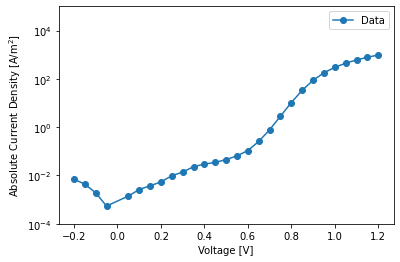

In [21]:
FolderName = 'test_data'
filename = 'PM6Y6_dark_t_0.000000E+0.txt'

df = pd.read_csv(os.path.join(FolderName,filename),delim_whitespace=True)
V = np.asarray(df['V']) # voltage in V
J = np.asarray(df['J']) # current density in A/m2 , use SI unit! if data is not in SI please make the necessary conversion.

plt.semilogy(V,abs(J),'-o')
plt.xlabel('Voltage [V]')
plt.ylabel('Absolute Current Density [A/m$^2$]')
plt.ylim(1e-4,1e5)
plt.legend(['Data'])
plt.show()

### Fit non ideal diode equation to dark JV-curves

R_s =  0.00017533902343748218 +/- 5.7521036027321257e-05 [Ohm m^2]
R_sh =  30.77273784070165 +/- 3.5709206055419433 [Ohm m^2]
J0 =  2.1274906610064138e-07 +/- 2.2136715973934546e-07 [A/m^2]
n =  1.7526570598705176 +/- 0.10943159459705279


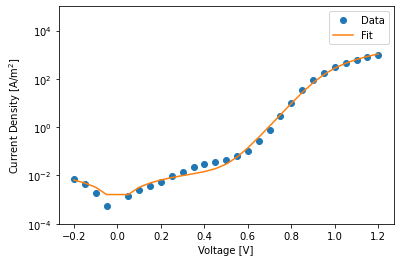

In [22]:
# Fit the non ideal diode equation
# using the take_log = True option leads to better results for the fit
res = FitNonIdealDiode(V,J,T=298.15,JV_type='dark',take_log=True,bounds=([1e-20, 0.8, 1e-8, 1e-3], [1e-3, 3, 1e2, 1e8])) 

# Fitting results
print('R_s = ',res['Rs'],'+/-',res['Rs_err'],'[Ohm m^2]')
print('R_sh = ',res['Rsh'],'+/-',res['Rsh_err'],'[Ohm m^2]')
print('J0 = ',res['J0'],'+/-',res['J0_err'],'[A/m^2]')
print('n = ',res['n'],'+/-',res['n_err'])

plt.plot(V,abs(J),'o')
plt.semilogy(V,abs(NonIdealDiode_dark(V,res['J0'],res['n'],res['Rs'],res['Rsh'])))

plt.xlabel('Voltage [V]')
plt.ylabel('Current Density [A/m$^2$]')
plt.ylim(1e-4,1e5)
plt.legend(['Data','Fit'])
plt.show()
